Importation des données dans une variable.

In [35]:
import pandas as pd
vins = pd.read_csv("vinsrougesnordportugal.csv")

Observation du jeu de données.

In [36]:
vins.head()

,acidité fixe,acidité volatile,acide citrique,sucre résiduel,chlorides,sulfites libres,sulfites (total),densité,pH,sulfates,alcool,qualité
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [37]:
vins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acidité fixe      1599 non-null   float64
 1   acidité volatile  1599 non-null   float64
 2   acide citrique    1599 non-null   float64
 3   sucre résiduel    1599 non-null   float64
 4   chlorides         1599 non-null   float64
 5   sulfites libres   1578 non-null   float64
 6   sulfites (total)  1599 non-null   float64
 7   densité           1599 non-null   float64
 8   pH                1599 non-null   float64
 9   sulfates          1599 non-null   float64
 10  alcool            1599 non-null   float64
 11  qualité           1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [38]:
vins["qualité"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: qualité, dtype: int64

In [39]:
vins.describe()

,acidité fixe,acidité volatile,acide citrique,sucre résiduel,chlorides,sulfites libres,sulfites (total),densité,pH,sulfates,alcool,qualité
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1578.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.913181,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.479351,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.750000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Représentation du jeu de données, puis séparation en jeu de test, jeu d'entrainement.

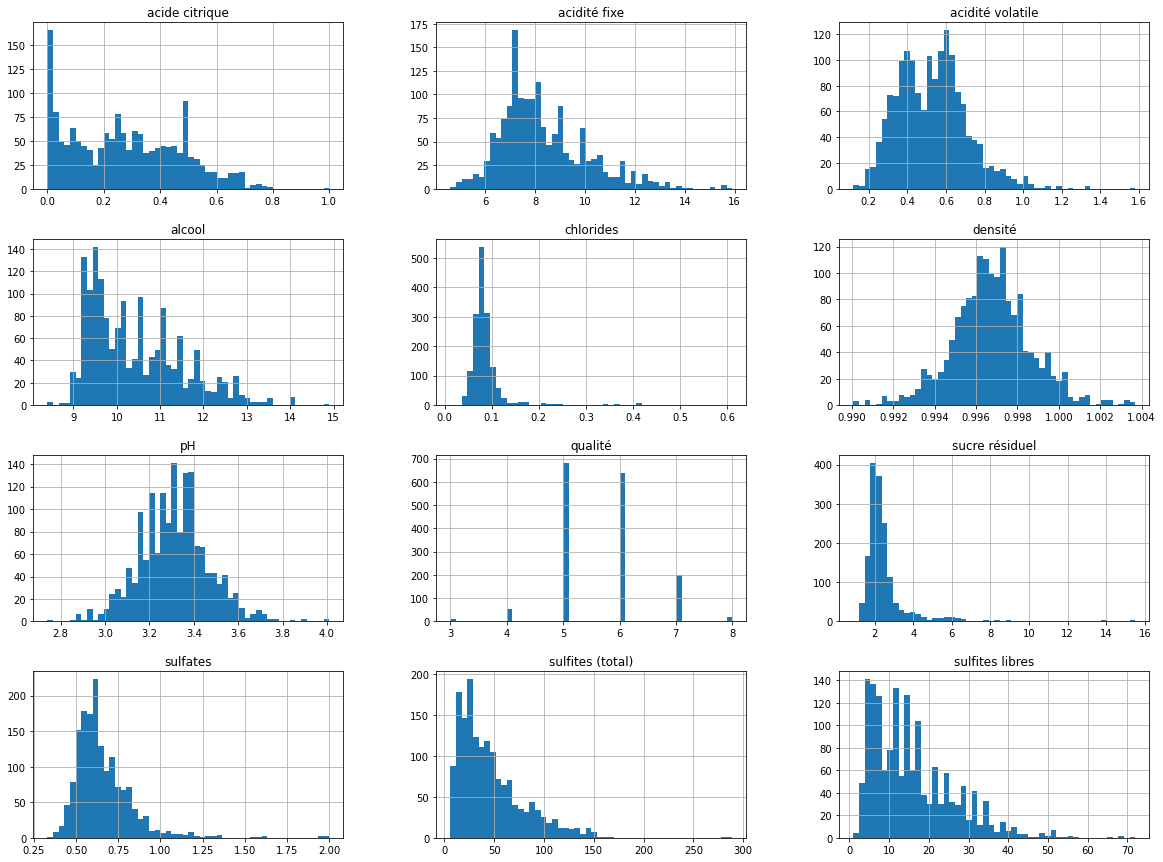

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
vins.hist(bins=50, figsize=(20,15))
plt.show()

In [41]:
corr_matrix = vins.corr()

In [42]:
abs(corr_matrix["qualité"]).sort_values(ascending=False)

qualité             1.000000
alcool              0.476166
acidité volatile    0.390558
sulfates            0.251397
acide citrique      0.226373
sulfites (total)    0.185100
densité             0.174919
chlorides           0.128907
acidité fixe        0.124052
pH                  0.057731
sulfites libres     0.053023
sucre résiduel      0.013732
Name: qualité, dtype: float64

In [43]:
vins["sulfites ajoutés"]=vins["sulfites (total)"]-vins["sulfites libres"]

In [44]:
vins.head()

,acidité fixe,acidité volatile,acide citrique,sucre résiduel,chlorides,sulfites libres,sulfites (total),densité,pH,sulfates,alcool,qualité,sulfites ajoutés
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,23.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,42.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,39.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,43.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,23.0


In [45]:
corr_matrix = vins.corr()
abs(corr_matrix["qualité"]).sort_values(ascending=False)

qualité             1.000000
alcool              0.476166
acidité volatile    0.390558
sulfates            0.251397
acide citrique      0.226373
sulfites ajoutés    0.208947
sulfites (total)    0.185100
densité             0.174919
chlorides           0.128907
acidité fixe        0.124052
pH                  0.057731
sulfites libres     0.053023
sucre résiduel      0.013732
Name: qualité, dtype: float64

In [46]:
import numpy as np
vins["sulfates_cat"] = pd.cut(vins["sulfates"],bins=[0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.1,np.inf],labels=[1,2,3,4,5,6,7,8])

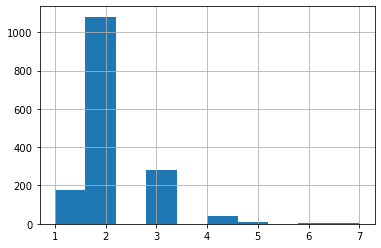

In [47]:
vins["sulfates_cat"].hist()

In [48]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=38)
for train_index, test_index in split.split(vins, vins["sulfates_cat"]):
    strat_train_set = vins.loc[train_index]
    strat_test_set = vins.loc[test_index]

In [49]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("sulfates_cat", axis=1, inplace=True)

In [50]:
strat_train_set.head()

,acidité fixe,acidité volatile,acide citrique,sucre résiduel,chlorides,sulfites libres,sulfites (total),densité,pH,sulfates,alcool,qualité,sulfites ajoutés
44,6.8,0.67,0.02,1.8,0.050,5.0,11.0,0.99620,3.48,0.52,9.5,5,6.0
1055,8.2,0.64,0.27,2.0,0.095,5.0,77.0,0.99747,3.13,0.62,9.1,6,72.0
1259,6.8,0.64,0.00,2.7,0.123,15.0,33.0,0.99538,3.44,0.63,11.3,6,18.0
1322,9.1,0.34,0.42,1.8,0.058,9.0,18.0,0.99392,3.18,0.55,11.4,5,9.0
779,7.1,0.52,0.03,2.6,0.076,21.0,92.0,0.99745,3.50,0.60,9.8,5,71.0


In [51]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1279 entries, 44 to 1504
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acidité fixe      1279 non-null   float64
 1   acidité volatile  1279 non-null   float64
 2   acide citrique    1279 non-null   float64
 3   sucre résiduel    1279 non-null   float64
 4   chlorides         1279 non-null   float64
 5   sulfites libres   1263 non-null   float64
 6   sulfites (total)  1279 non-null   float64
 7   densité           1279 non-null   float64
 8   pH                1279 non-null   float64
 9   sulfates          1279 non-null   float64
 10  alcool            1279 non-null   float64
 11  qualité           1279 non-null   int64  
 12  sulfites ajoutés  1263 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 139.9 KB


In [52]:
valeurs_pred = strat_train_set["qualité"].copy()
strat_train_set = strat_train_set.drop("qualité", axis=1)

In [53]:
strat_train_set.head()

,acidité fixe,acidité volatile,acide citrique,sucre résiduel,chlorides,sulfites libres,sulfites (total),densité,pH,sulfates,alcool,sulfites ajoutés
44,6.8,0.67,0.02,1.8,0.050,5.0,11.0,0.99620,3.48,0.52,9.5,6.0
1055,8.2,0.64,0.27,2.0,0.095,5.0,77.0,0.99747,3.13,0.62,9.1,72.0
1259,6.8,0.64,0.00,2.7,0.123,15.0,33.0,0.99538,3.44,0.63,11.3,18.0
1322,9.1,0.34,0.42,1.8,0.058,9.0,18.0,0.99392,3.18,0.55,11.4,9.0
779,7.1,0.52,0.03,2.6,0.076,21.0,92.0,0.99745,3.50,0.60,9.8,71.0


In [54]:
moyenne_1 = strat_train_set['sulfites libres'].mean()
moyenne_2 = strat_train_set['sulfites ajoutés'].mean()

In [55]:
strat_train_set['sulfites libres'].fillna(moyenne_1, inplace=True)
strat_train_set['sulfites ajoutés'].fillna(moyenne_2, inplace=True)

In [56]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1279 entries, 44 to 1504
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acidité fixe      1279 non-null   float64
 1   acidité volatile  1279 non-null   float64
 2   acide citrique    1279 non-null   float64
 3   sucre résiduel    1279 non-null   float64
 4   chlorides         1279 non-null   float64
 5   sulfites libres   1279 non-null   float64
 6   sulfites (total)  1279 non-null   float64
 7   densité           1279 non-null   float64
 8   pH                1279 non-null   float64
 9   sulfates          1279 non-null   float64
 10  alcool            1279 non-null   float64
 11  sulfites ajoutés  1279 non-null   float64
dtypes: float64(12)
memory usage: 129.9 KB


In [57]:
from sklearn.preprocessing import StandardScaler

jeu_entrainement_echelle = StandardScaler().fit_transform(strat_train_set)
jeu_entrainement_final = pd.DataFrame(jeu_entrainement_echelle, columns=strat_train_set.columns, index=strat_train_set.index)

In [58]:
jeu_entrainement_final.head()

,acidité fixe,acidité volatile,acide citrique,sucre résiduel,chlorides,sulfites libres,sulfites (total),densité,pH,sulfates,alcool,sulfites ajoutés
44,-0.864487,0.788405,-1.285885,-0.518976,-0.797804,-1.057510,-1.084022,-0.263439,1.076551,-0.823933,-0.878037,-0.913777
1055,-0.050590,0.622008,-0.005845,-0.377786,0.158434,-1.057510,0.902575,0.405727,-1.197399,-0.229668,-1.248153,1.507490
1259,-0.864487,0.622008,-1.388288,0.116380,0.753427,-0.107353,-0.421823,-0.695499,0.816671,-0.170241,0.787485,-0.473547
1322,0.472629,-1.041970,0.762179,-0.518976,-0.627806,-0.677447,-0.873323,-1.464776,-0.872549,-0.645654,0.880014,-0.803720
779,-0.690080,-0.043583,-1.234683,0.045785,-0.245311,0.462741,1.354075,0.395189,1.206491,-0.348521,-0.600450,1.470804


In [59]:
from sklearn.linear_model import LinearRegression
reg_lin = LinearRegression()
reg_lin.fit(jeu_entrainement_final,valeurs_pred)

LinearRegression()

In [60]:
qques_données = jeu_entrainement_final.iloc[:5]
qques_valeurs_reelles = valeurs_pred[:5]
print("Prédictions :", reg_lin.predict(qques_données))
print("Valeurs réelles : ", list(qques_valeurs_reelles))

Prédictions : [5.17970257 5.03078547 5.69657483 6.2093134  5.26550275]
Valeurs réelles :  [5, 6, 6, 5, 5]


In [61]:
from sklearn.metrics import mean_squared_error

qualite_predictions = reg_lin.predict(jeu_entrainement_final)
lin_mse = mean_squared_error(valeurs_pred, qualite_predictions)
lin_rmse = np.sqrt(lin_mse)
print("RMSE :", lin_rmse)

RMSE : 0.6373139636962701


In [62]:
from sklearn.tree import DecisionTreeRegressor
arbre_dec = DecisionTreeRegressor()
arbre_dec.fit(jeu_entrainement_final,valeurs_pred)

DecisionTreeRegressor()

In [63]:
qques_données = jeu_entrainement_final.iloc[:5]
qques_valeurs_reelles = valeurs_pred[:5]
print("Prédictions :", arbre_dec.predict(qques_données))
print("Valeurs réelles : ", list(qques_valeurs_reelles))

Prédictions : [5. 6. 6. 5. 5.]
Valeurs réelles :  [5, 6, 6, 5, 5]


In [64]:
from sklearn.metrics import mean_squared_error

qualite_predictions = arbre_dec.predict(jeu_entrainement_final)
arbre_mse = mean_squared_error(valeurs_pred, qualite_predictions)
arbre_rmse = np.sqrt(arbre_mse)
print("RMSE :", arbre_rmse)

RMSE : 0.0


In [65]:
from sklearn.ensemble import RandomForestRegressor
foret_alea = RandomForestRegressor()
foret_alea.fit(jeu_entrainement_final,valeurs_pred)

RandomForestRegressor()

In [66]:
qques_données = jeu_entrainement_final.iloc[:5]
qques_valeurs_reelles = valeurs_pred[:5]
print("Prédictions :", foret_alea.predict(qques_données))
print("Valeurs réelles : ", list(qques_valeurs_reelles))

Prédictions : [5.01 5.85 6.01 5.5  5.21]
Valeurs réelles :  [5, 6, 6, 5, 5]


In [69]:
from sklearn.metrics import mean_squared_error

qualite_predictions = foret_alea.predict(jeu_entrainement_final)
foret_mse = mean_squared_error(valeurs_pred, qualite_predictions)
foret_rmse = np.sqrt(foret_mse)
print("RMSE :", foret_rmse)

RMSE : 0.21688677899371228


In [73]:
from sklearn.model_selection import cross_val_score
lin_dec_scores = cross_val_score(reg_lin, jeu_entrainement_final, valeurs_pred, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores=np.sqrt(-lin_dec_scores)
print(lin_rmse_scores.mean())

0.6442943128018607


In [74]:
from sklearn.model_selection import cross_val_score
arbre_dec_scores = cross_val_score(arbre_dec, jeu_entrainement_final, valeurs_pred, scoring="neg_mean_squared_error", cv=10)
arbre_rmse_scores=np.sqrt(-arbre_dec_scores)
print(arbre_rmse_scores.mean())

0.7995277769022291


In [76]:
from sklearn.model_selection import cross_val_score
foret_dec_scores = cross_val_score(foret_alea, jeu_entrainement_final, valeurs_pred, scoring="neg_mean_squared_error", cv=10)
foret_rmse_scores=np.sqrt(-foret_dec_scores)
print(foret_rmse_scores.mean())

0.5871177995780542


In [84]:
from sklearn.model_selection import GridSearchCV
param_grid = [{"n_estimators" : [1000], "max_features" : [3]},]
foret_alea = RandomForestRegressor()
grid_search = GridSearchCV(foret_alea, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(jeu_entrainement_final, valeurs_pred)
print(grid_search.best_params_)
cvres = grid_search.cv_results_
for mean_scores, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_scores), params)

{'max_features': 3, 'n_estimators': 1000}
0.5808903281352501 {'max_features': 3, 'n_estimators': 1000}
